## Winters, Alexander (V00970263)

# Problem 9. Guessing the Source

### Sources:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py

https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
import pandas as pd
# Plotting support
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [4]:
url = 'https://gist.githubusercontent.com/inumanag/ebb1566746aba800899e406f03c799c1/raw/4dd9fab739281f0bdcbc0c1829fb1b4df2173446/prob9-data.txt'
df = pd.read_csv(url, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [5]:
df['X'] = np.arange(df.shape[0])
df['y'] = df.pop(0)

X = df['X'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
regressor = LinearRegression()
regressor.fit(X, y)

prediction = regressor.predict(X)

df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': prediction.flatten()})

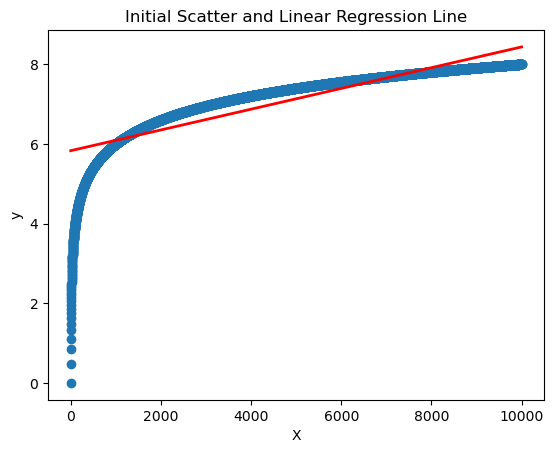

In [8]:
plt.scatter(X, y)
plt.plot(X, prediction, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Initial Scatter and Linear Regression Line')
plt.show()

In [9]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, prediction)))

Mean Absolute Error: 0.2811853970117464
Mean Squared Error: 0.18713909707353238
Root Mean Squared Error: 0.4325957663610826


In [10]:
def best_transformation(X, y):
    transforms = {}
    
    for i in range(10):
        poly = PolynomialFeatures(i)
        X_poly = poly.fit_transform(X)
        
        poly_regressor = LinearRegression()
        poly_regressor.fit(X_poly, y)
        
        poly_y_pred = poly_regressor.predict(X_poly)
        
        mse = metrics.mean_squared_error(y, poly_y_pred)
        
        transforms[i] = mse
        
    return transforms

Poly Degree 0: 0.7526660098869282
Poly Degree 1: 0.18713909707353238
Poly Degree 2: 0.08252583748800815
Poly Degree 3: 0.045970864004532305
Poly Degree 4: 0.029088302525634647
Poly Degree 5: 0.08253060133142283
Poly Degree 6: 0.13716973424520082
Poly Degree 7: 0.1871439197908348
Poly Degree 8: 0.23134073626836266
Poly Degree 9: 0.2700541051636619

The Best Tranform is: Poly Degree 4 with MSE: 0.029088302525634647


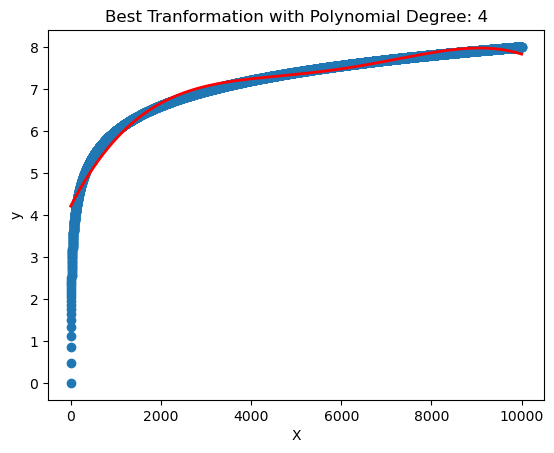

In [11]:
transform_list = best_transformation(X, y)

for key, value in transform_list.items():
    print("Poly Degree " + str(key) + ": " + str(value))

min_mse = min(transform_list, key=transform_list.get)

print("\nThe Best Tranform is: Poly Degree " + str(min_mse) + " with MSE: " + str(transform_list[min_mse]))

best_poly = PolynomialFeatures(min_mse)
X_poly = best_poly.fit_transform(X)

best_regressor = LinearRegression()
best_regressor.fit(X_poly, y)

best_pred = best_regressor.predict(X_poly)

plt.scatter(X, y)
plt.plot(X, best_pred, color='red', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Tranformation with Polynomial Degree: ' + str(min_mse))
plt.show()